<a href="https://colab.research.google.com/github/aslisahin0/MachineLearning/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast cancer dataset head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  

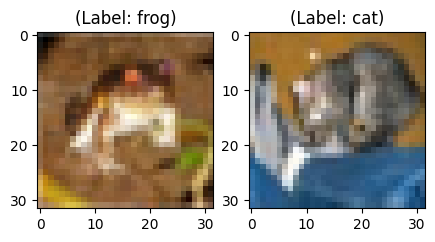

In [ ]:
#Breast Cancer Data Exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10

breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

labels = np.reshape(breast_labels, (569, 1))
final_breast_data = np.concatenate([breast_data, labels], axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features, 'label')
breast_dataset.columns = features_labels

breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

print("Breast cancer dataset head:")
print(breast_dataset.head())
print("\nBreast cancer dataset tail:")
print(breast_dataset.tail())
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

plt.figure(figsize=[5, 5])
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32, 32, 3))
plt.imshow(curr_img)
plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")")
plt.subplot(122)
curr_img = np.reshape(x_test[0], (32, 32, 3))
plt.imshow(curr_img)
plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")")
plt.show()

Mean of normalized features: -6.118909323768877e-16, Standard deviation of normalized features: 1.0
Normalized Data (tail):
     feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
564  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060  1.947285   
565  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833  0.693043   
566  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680  0.046588   
567  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144  3.296944   
568 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752 -1.114873   

     feature7  feature8  feature9  ...  feature20  feature21  feature22  \
564  2.320965 -0.312589 -0.931027  ...   1.901185   0.117700   1.752563   
565  1.263669 -0.217664 -1.058611  ...   1.536720   2.047399   1.421940   
566  0.105777 -0.809117 -0.895587  ...   0.561361   1.374854   0.579001   
567  2.658866  2.137194  1.043695  ...   1.961239   2.237926   2.303601   
568 -1.261820 -0.820070 -0.561032  ...

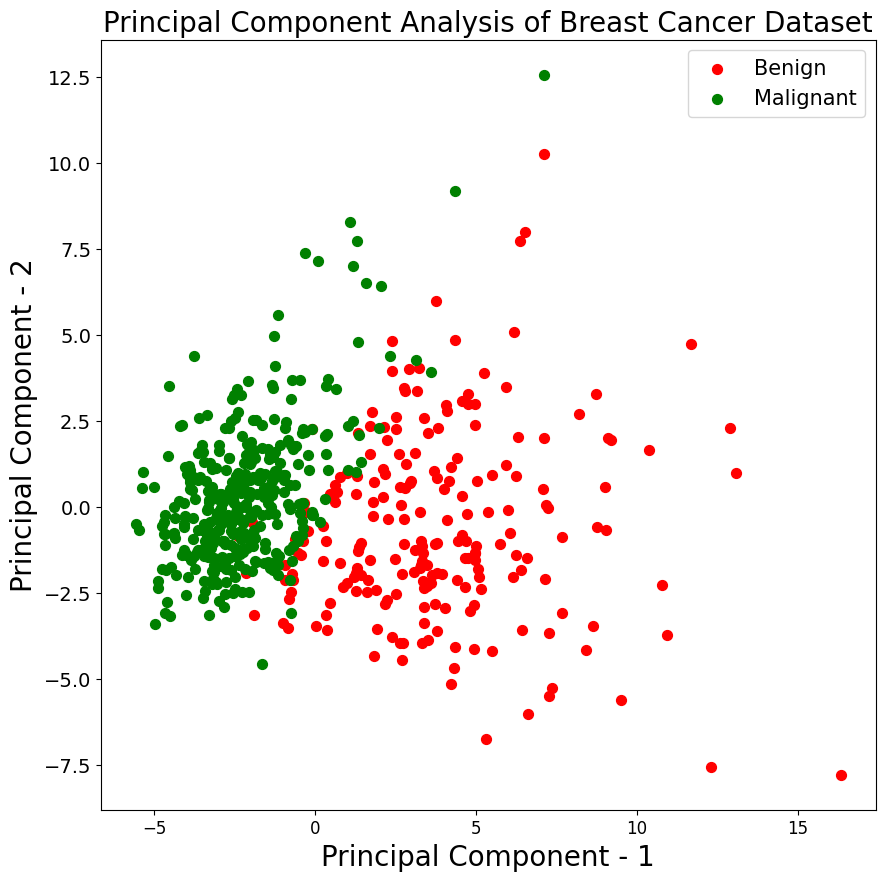

In [ ]:
#Data Visualization using PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_labels = breast.target

labels = np.reshape(breast_labels, (569, 1))
final_breast_data = np.concatenate([breast_data, labels], axis=1)
features = breast.feature_names
features_labels = np.append(features, 'label')
breast_dataset = pd.DataFrame(final_breast_data, columns=features_labels)

x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)
print(f"Mean of normalized features: {np.mean(x)}, Standard deviation of normalized features: {np.std(x)}")

feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x, columns=feat_cols)
print("Normalized Data (tail):")
print(normalised_breast.tail())

pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_Df = pd.DataFrame(data=principalComponents_breast, columns=['principal component 1', 'principal component 2'])
print("Principal Components (tail):")
print(principal_breast_Df.tail())

print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

plt.figure(figsize=(10, 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset", fontsize=20)

breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1'],
                principal_breast_Df.loc[indicesToKeep, 'principal component 2'],
                c=color, s=50)

plt.legend(targets, prop={'size': 15})


Size of the dataframe: (50000, 3073)
Explained variation per principal component: [0.2907663  0.11253144]


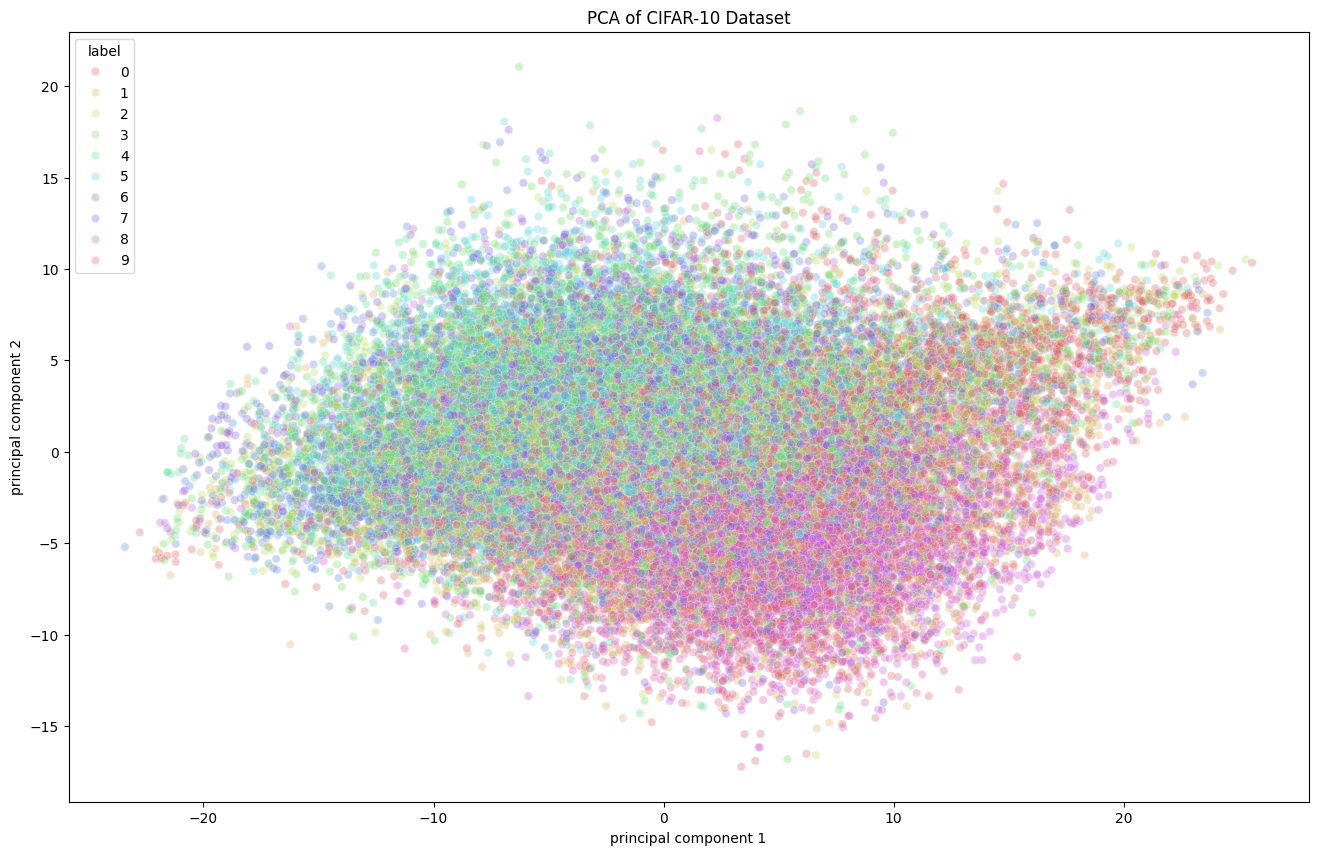

In [ ]:
#Visualizing the CIFAR - 10 data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.datasets import cifar10
import seaborn as sns

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_flat = x_train.reshape(-1, 3072)
feat_cols = ['pixel' + str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat, columns=feat_cols)
df_cifar['label'] = y_train

print('Size of the dataframe: {}'.format(df_cifar.shape))
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:, :-1])
principal_cifar_Df = pd.DataFrame(data=principalComponents_cifar, columns=['principal component 1', 'principal component 2'])
principal_cifar_Df['label'] = y_train
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue='label',
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)
plt.title("PCA of CIFAR-10 Dataset")
plt.show()



Number of components chosen: 99
Epoch 1/20
391/391 [==============================] - 21s 50ms/step - loss: 1.6246 - accuracy: 0.4229 - val_loss: 1.5123 - val_accuracy: 0.4650
Epoch 2/20
391/391 [==============================] - 20s 52ms/step - loss: 1.3206 - accuracy: 0.5313 - val_loss: 1.3433 - val_accuracy: 0.5188
Epoch 3/20
391/391 [==============================] - 21s 54ms/step - loss: 1.1429 - accuracy: 0.5940 - val_loss: 1.3008 - val_accuracy: 0.5436
Epoch 4/20
391/391 [==============================] - 21s 53ms/step - loss: 0.9865 - accuracy: 0.6478 - val_loss: 1.3110 - val_accuracy: 0.5560
Epoch 5/20
391/391 [==============================] - 21s 53ms/step - loss: 0.8273 - accuracy: 0.7037 - val_loss: 1.3667 - val_accuracy: 0.5543
Epoch 6/20
391/391 [==============================] - 19s 48ms/step - loss: 0.6724 - accuracy: 0.7586 - val_loss: 1.4335 - val_accuracy: 0.5715
Epoch 7/20
391/391 [==============================] - 22s 57ms/step - loss: 0.5272 - accuracy: 0.8104 - 

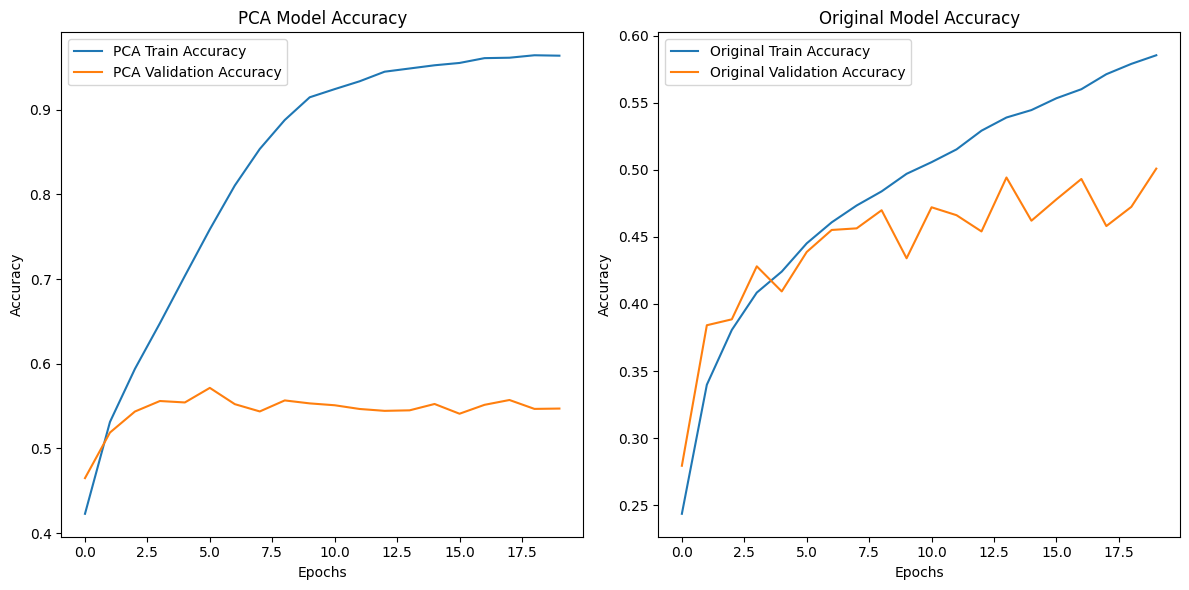

In [3]:
#Speed Up Deep Learning Training using PCA with CIFAR - 10 Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_flat = x_train.reshape(-1, 3072)
x_test_flat = x_test.reshape(-1, 3072)

pca = PCA(n_components=0.9)
pca.fit(x_train_flat)

train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

print(f'Number of components chosen: {pca.n_components_}')
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

batch_size = 128
num_classes = 10
epochs = 20

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
    return model

model_pca = create_model(train_img_pca.shape[1])
history_pca = model_pca.fit(train_img_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                            validation_data=(test_img_pca, y_test))

model_original = create_model(3072)
history_original = model_original.fit(x_train_flat, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                                      validation_data=(x_test_flat, y_test))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_pca.history['accuracy'], label='PCA Train Accuracy')
plt.plot(history_pca.history['val_accuracy'], label='PCA Validation Accuracy')
plt.title('PCA Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_original.history['accuracy'], label='Original Train Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Validation Accuracy')
plt.title('Original Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

